In [1]:
from pyforest import*

In [2]:
d=pd.read_excel('edited final.xlsx')

In [3]:
d.head()

,agent_state,application_type,case_no,case_received_date,case_status,class_of_admission,country_of_citizenship,decision_date,employer_num_employees,employer_yr_estab,...,job_title,job_training,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay
0,NaN,PERM,A-07323-97014,NaT,Certified,J-1,ARMENIA,2012-02-01,NaN,NaN,...,NaN,NaN,NY,yr,75629.00,Level II,OES,IT,75629,yr
1,NaN,PERM,A-07332-99439,NaT,Denied,B-2,POLAND,2011-12-21,NaN,NaN,...,NaN,NaN,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr
2,NaN,PERM,A-07333-99643,NaT,Certified,H-1B,INDIA,2011-12-01,NaN,NaN,...,NaN,NaN,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr
3,NaN,PERM,A-07339-01930,NaT,Certified,B-2,SOUTH KOREA,2011-12-01,NaN,NaN,...,NaN,NaN,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr
4,NaN,PERM,A-07345-03565,NaT,Certified,L-1,CANADA,2012-01-26,NaN,NaN,...,NaN,NaN,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr


In [4]:
d.drop_duplicates(inplace=True)

### Extracting month and year  from Dates
1. The first 2 numbers in the case_no follow a pattern and depict the year .
2. It has been observed that in each record , either the case_no is available or the case_received_date
3. We will hence extract the year from case_no and impute the case_received_date_year column for its missing values

In [5]:
d['case_received_date_year']=d.case_received_date.dt.year

d['decision_date_year']=d.decision_date.dt.year

In [6]:
raw=d.case_no[d.case_no.notnull()]
year=raw.transform(lambda x:x.split("-")[1])
d['Yr']='20'+year

In [7]:
y=d.Yr.astype('str')
new=[]
for i in y.index:
    new.append(y[i][:-3])
    
d['Received_Year']=new

d.drop('Yr',axis=1,inplace=True)

d.case_received_date_year.fillna(d.Received_Year,inplace=True)

d.drop(['case_no','case_received_date','Received_Year','decision_date'],axis=1,inplace=True)

d.decision_date_year=d.decision_date_year.astype('int')
d.head()

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year
0,NaN,PERM,Certified,J-1,ARMENIA,NaN,NaN,NEW YORK,NETSOFT USA INC.,NY,...,NY,yr,75629.00,Level II,OES,IT,75629,yr,2007,2012
1,NaN,PERM,Denied,B-2,POLAND,NaN,NaN,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,...,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr,2007,2011
2,NaN,PERM,Certified,H-1B,INDIA,NaN,NaN,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,...,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr,2007,2011
3,NaN,PERM,Certified,B-2,SOUTH KOREA,NaN,NaN,FLUSHING,EBENEZER MISSION CHURCH,NY,...,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr,2007,2011
4,NaN,PERM,Certified,L-1,CANADA,NaN,NaN,ALBANY,ALBANY INTERNATIONAL CORP.,NY,...,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr,2007,2012


In [8]:
d.case_received_date_year.unique()

array(['2007', '2008', '2006', '2009', '2011', '2010', '2012', '2013',
       '2005', '2014', 2013.0, 2014.0, 2009.0, 2010.0, 2008.0, 2012.0,
       2015.0, 2006.0, 2007.0, 2011.0, '', 2016.0], dtype=object)

In [9]:
d[d.case_received_date_year=='']

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year
188375,FLORIDA,NaN,Withdrawn,H-1B,CHILE,88.0,1999.0,COCONUT GROVE,TRAX USA CORP.,FLORIDA,...,FLORIDA,Year,96325.0,Level IV,OES,NaN,96325,Year,,2014
198698,CALIFORNIA,NaN,Withdrawn,H-1B,BRAZIL,30000.0,1998.0,NEW YORK,PRICEWATERHOUSECOOPERS,NEW YORK,...,NEW YORK,Year,132558.0,Level IV,OES,NaN,132558,Year,,2015


In [10]:
d.case_received_date_year.replace("",1996,inplace=True) #1996 is the mode

In [11]:
d.case_received_date_year=d.case_received_date_year.astype('int')

In [12]:
d[d.case_received_date_year>d.decision_date_year]   # This imputation is succesful

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year


In [13]:
d.employer_yr_estab.isnull().sum()

135404

### Inferences :
1. We have extracted useful data from case_no (63% missing values) and case_received_date (37% missing values) , so now we will drop them.

2. The new extracted features: case_received_date_mn nad decision_date_mn are not contributing to be helpful and moreover have missing values , so we have dropped them.


In [14]:
d.employer_yr_estab.median()

1996.0

### Binning the years 

In [15]:
pd.qcut(d.employer_yr_estab,3)

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
5                      NaN
6                      NaN
7                      NaN
8                      NaN
9                      NaN
10                     NaN
11                     NaN
12                     NaN
13                     NaN
14                     NaN
15                     NaN
16                     NaN
17                     NaN
18                     NaN
19                     NaN
20                     NaN
21                     NaN
22                     NaN
23                     NaN
24                     NaN
25                     NaN
26                     NaN
27                     NaN
28                     NaN
29                     NaN
                ...       
374332    (-0.001, 1988.0]
374333    (2001.0, 2016.0]
374334    (2001.0, 2016.0]
374335    (1988.0, 2001.0]
374336    (2001.0, 2016.0]
374337    (-0.001, 1988.0]
3

In [16]:
d.employer_yr_estab.fillna(-1,inplace=True)  # Keeping the null values aside

In [17]:
def age(x):
    if x==-1:
        return "Unavailable"
    elif x>-1 and x<1600:
        return "Old"
    elif x>1988 and x<2001:
        return 'Old'
    elif x<1988:
        return "Ancient"
    else:
        return "New"
    
d.employer_yr_estab=d.employer_yr_estab.apply(age)

In [18]:
d.employer_yr_estab.value_counts()

Unavailable    135404
New             83596
Ancient         75986
Old             70641
Name: employer_yr_estab, dtype: int64

In [19]:
d.employer_yr_estab.replace('Unavailable',np.nan,inplace=True)
d.employer_yr_estab.fillna('New',limit=83596,inplace=True)
d.employer_yr_estab.fillna('Ancient',limit=75986,inplace=True)
d.employer_yr_estab.fillna('Old',limit=70641,inplace=True)
d.employer_yr_estab.value_counts()

New        167192
Ancient    127794
Old         70641
Name: employer_yr_estab, dtype: int64

In [20]:
d.head()

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year
0,NaN,PERM,Certified,J-1,ARMENIA,NaN,New,NEW YORK,NETSOFT USA INC.,NY,...,NY,yr,75629.00,Level II,OES,IT,75629,yr,2007,2012
1,NaN,PERM,Denied,B-2,POLAND,NaN,New,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,...,NY,yr,37024.00,Level I,OES,Other Economic Sector,37024,yr,2007,2011
2,NaN,PERM,Certified,H-1B,INDIA,NaN,New,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,...,MD,yr,47923.00,Level I,OES,Aerospace,47923,yr,2007,2011
3,NaN,PERM,Certified,B-2,SOUTH KOREA,NaN,New,FLUSHING,EBENEZER MISSION CHURCH,NY,...,NY,hr,10.97,Level II,OES,Other Economic Sector,10.97,hr,2007,2011
4,NaN,PERM,Certified,L-1,CANADA,NaN,New,ALBANY,ALBANY INTERNATIONAL CORP.,NY,...,NY,yr,94890.00,Level IV,OES,Advanced Mfg,100000,yr,2007,2012


In [21]:
d.shape

(365627, 25)

### Correcting the values of units of pay

In [22]:
d.pv_unit_of_pay_9089.replace('yr','Year',inplace=True)
d.pv_unit_of_pay_9089.replace('hr','Hour',inplace=True)
d.pv_unit_of_pay_9089.replace('bi','Bi-Weekly',inplace=True)
d.pv_unit_of_pay_9089.replace('mth','Month',inplace=True)
d.pv_unit_of_pay_9089.replace('wk','Week',inplace=True)


In [23]:
d.wage_unit_of_pay.replace('hr','Hour',inplace=True)
d.wage_unit_of_pay.replace('bi','Bi-Weekly',inplace=True)
d.wage_unit_of_pay.replace('mth','Month',inplace=True)
d.wage_unit_of_pay.replace('wk','Week',inplace=True)
d.wage_unit_of_pay.replace('yr','Year',inplace=True)

### Analyzing columns like states to generalize them

In [24]:
state_abb = { 'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
                 'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
                  'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
                'Maine': 'ME','Maryland': 'MD', 'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
                'Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ',
                'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK',
                'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD',
                'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','Washington': 'WA',
                'West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY','Northern Mariana Islands':'MP', 'Palau': 'PW', 
                'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'District of Columbia': 'DC','MARSHALL ISLANDS':'MH'}
us_state_abbrev = {k.upper(): v for k, v in state_abb.items()}
d['agent_state'].replace(us_state_abbrev, inplace=True)
d.agent_state = d.agent_state.astype(str)

In [25]:
d.agent_state.unique()

array(['nan', 'WI', 'NC', 'CO', 'CA', 'MI', 'NY', 'TX', 'PA', 'NJ', 'MO',
       'FL', 'VA', 'OH', 'DC', 'IN', 'GA', 'MA', 'IL', 'AL', 'OK', 'WA',
       'CT', 'MN', 'AR', 'HI', 'MD', 'UT', 'PR', 'AZ', 'NV', 'NH', 'OR',
       'KS', 'NM', 'VT', 'TN', 'NE', 'LA', 'KY', 'GUAM', 'IA', 'SC', 'RI',
       'ME', 'ID', 'ND', 'AK', 'MS', 'DE', 'MH', 'SD', 'MT', 'WV', 'GU',
       'MP', 'WY', 'VI'], dtype=object)

In [26]:
d.agent_state.value_counts(1).head()

nan    0.440769
CA     0.148843
NY     0.069735
TX     0.047398
MA     0.032965
Name: agent_state, dtype: float64

##### Inference:
1. Since, agent_state has 58 unique values, 44% nan values and it is not contributing significantly to the business problem. 

2. Moreover , similar information is available in 'Source' column.

In [27]:
from scipy.stats import chi2_contingency
# Chi-Square Test
# Null hypothesis H0: There is no association between agent_state and case_status
# Alternate hypothesis H1: There is association between agent_state and case_status

In [28]:
f=pd.crosstab(d.case_status,d.agent_state)
#chi2_contingency(f)


In [29]:
stat, p, dof, expected=chi2_contingency(f)
p

0.0

In [30]:
# Since p value < alpha (0.05) ,we reject the null hypothesis
#There is association between agent_state and case_status

In [31]:
regions = {
    'ME':'Northeast', 
    'NY':'Northeast', 
    'NJ':'Northeast', 
    'VT':'Northeast',
    'MA':'Northeast',
    'RI':'Northeast',
    'CT':'Northeast',
    'NH':'Northeast',
    'PA':'Northeast',
    'IL':'Midwest',
    'IN':'Midwest',
    'IA':'Midwest', 
    'KS':'Midwest',
    'MI':'Midwest', 
    'MN':'Midwest', 
    'MO':'Midwest', 
    'NE':'Midwest',
    'ND':'Midwest', 
    'OH':'Midwest', 
    'SD':'Midwest', 
    'WI':'Midwest',
    'DE':'South',
    'FL':'South', 
    'GA':'South',
    'MD':'South',
    'NC':'South',
    'SC':'South',
    'VA':'South',
    'WV':'South',
    'AL':'South',
    'KY':'South',
    'MS':'South',
    'TN':'South',
    'AR':'South',
    'LA':'South', 
    'OK':'South',
    'TX':'South',
    'MT':'West',
    'WY':'West', 
    'CO':'West', 
    'NM':'West', 
    'ID':'West', 
    'UT':'West', 
    'AZ':'West', 
    'NV':'West',
    'WA':'West', 
    'OR':'West', 
    'CA':'West', 
    'AK':'West',
    'HI':'West',
    'DC':'Other', 
    'GUAM':'Island',
    'GU':'Island',
    'PR':'Island', 
    'MP':'Island', 
    'VI':'Island',
    'BC':'Northeast',
    'BRITISH COLUMBIA':'Northeast',  
    'nan':'Other',
    'FEDERATED STATES OF MICRONESIA':'Other',
'MH':'Island'}

In [32]:
def region(x):
    return regions[x]

d['agent_state'] = d['agent_state'].apply(region)


In [33]:
d.agent_state.value_counts()

Other        165132
West          65564
Northeast     53072
South         52972
Midwest       28620
Island          267
Name: agent_state, dtype: int64

In [34]:
d.agent_state.replace('Other',np.nan,inplace=True)
d.agent_state.fillna('West',limit=65564,inplace=True)
d.agent_state.fillna('Northeast',limit=53072,inplace=True)
d.agent_state.fillna('South',limit=52972,inplace=True)
d.agent_state.value_counts(1)

West         0.358639
Northeast    0.290307
South        0.272048
Midwest      0.078276
Island       0.000730
Name: agent_state, dtype: float64

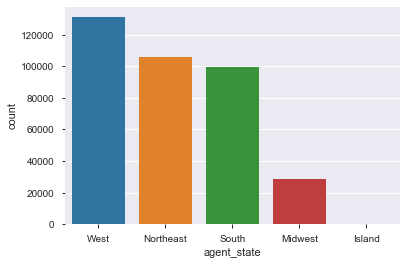

In [35]:
sns.countplot(d.agent_state)
plt.show()

In [36]:
#2
d.application_type.value_counts(1)

ONLINE      0.832149
PERM        0.152112
MAILEDIN    0.015739
Name: application_type, dtype: float64

In [37]:
d.application_type.unique()

array(['PERM', 'ONLINE', 'MAILEDIN', nan], dtype=object)

In [38]:
# Chi-Square Test
# Null hypothesis H0: There is no association between application_type and case_status
# Alternate hypothesis H1: There is association between application_type and case_status

In [39]:
app=pd.crosstab(d.case_status,d.application_type)
stat, p, dof, expected=chi2_contingency(app)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

0.0

#### Creating a new level for missing values 

In [40]:
#d.application_type.replace(np.nan,'Unavailable',inplace=True)
d.application_type.value_counts()

ONLINE      112564
PERM         20576
MAILEDIN      2129
Name: application_type, dtype: int64

In [41]:
#d.application_type.replace('Unavailable',np.nan,inplace=True)
d.application_type.fillna('ONLINE',limit=112564,inplace=True)
d.application_type.fillna('PERM',limit=20576,inplace=True)
d.application_type.fillna('MAILEDIN',limit=2129,inplace=True)
d.application_type.value_counts(1)

ONLINE      0.832149
PERM        0.152112
MAILEDIN    0.015739
Name: application_type, dtype: float64

In [42]:
d.isnull().sum()/d.shape[0]

agent_state                      0.000000
application_type                 0.260071
case_status                      0.000000
class_of_admission               0.057493
country_of_citizenship           0.000164
employer_num_employees           0.370183
employer_yr_estab                0.000000
employer_city                    0.000038
employer_name                    0.000033
employer_state                   0.000115
foreign_worker_info_education    0.370071
foreign_worker_info_major        0.414800
job_experience                   0.369997
job_title                        0.370085
job_training                     0.370005
job_work_state                   0.000282
pv_unit_of_pay_9089              0.026338
previous_salary                  0.006055
level                            0.074106
source_name                      0.005735
sector                           0.646995
wage_offer                       0.313902
wage_unit_of_pay                 0.316413
case_received_date_year          0

### Imputing Missing values in columns less with than 2% missing values

In [43]:
d.source_name.fillna(d.source_name.mode()[0],inplace=True)
d.previous_salary.fillna(d.previous_salary.median(),inplace=True)
d.job_work_state.fillna(d.job_work_state.mode()[0],inplace=True)
d.country_of_citizenship.fillna(d.country_of_citizenship.mode()[0],inplace=True)
d.employer_city.fillna(d.employer_city.mode()[0],inplace=True)
d.employer_name.fillna(d.employer_name.mode()[0],inplace=True)
#d.employer_name.fillna(d.employer_name.mode()[0],inplace=True)
#d.employer_state.fillna(d.employer_state.mode()[0],inplace=True)
d.isnull().sum()[d.isnull().sum()/d.shape[0]>0]

application_type                  95089
class_of_admission                21021
employer_num_employees           135349
employer_state                       42
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
pv_unit_of_pay_9089                9630
level                             27095
sector                           236559
wage_offer                       114771
wage_unit_of_pay                 115689
dtype: int64

### Generalizing the Class_of_admsn of Visa

In [44]:
d.class_of_admission.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

In [45]:
# Chi-Square Test
# Null hypothesis H0: There is no association between class_of_admission and case_status
# Alternate hypothesis H1: There is association between class_of_admission and case_status
clas=pd.crosstab(d.case_status,d.class_of_admission)
stat, p, dof, expected=chi2_contingency(clas)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

0.0

Visa categories are further divided into sub-categories. So we can use the parent Category in order to generalize it. 

https://www.bankbazaar.com/visa/types-of-us-visa.html

https://uk.usembassy.gov/visas/visa-directory/

https://travel.state.gov/content/travel/en/us-visas/visa-information-resources/all-visa-categories.html

In [46]:
d.class_of_admission.replace('J-1','J',inplace=True)
d.class_of_admission.replace('J-2','J',inplace=True)
d.class_of_admission.replace('B-2','B',inplace=True)
d.class_of_admission.replace('B-1','B',inplace=True)
d.class_of_admission.replace('H-2B','H-1B',inplace=True)
d.class_of_admission.replace('H-2A','H-1B',inplace=True)
d.class_of_admission.replace('H-1A','H-1B',inplace=True)
d.class_of_admission.replace('H-1B1','H-1B',inplace=True)
d.class_of_admission.replace('H-3','H-1B',inplace=True)
d.class_of_admission.replace('H-4','H-1B',inplace=True)
d.class_of_admission.replace('H-1C','H-1B',inplace=True)
d.class_of_admission.replace('H1B','H-1B',inplace=True)
d.class_of_admission.replace('L-1','L',inplace=True)
d.class_of_admission.replace('L-2','L',inplace=True)
d.class_of_admission.replace('Parol','Parole',inplace=True)
d.class_of_admission.replace('Parolee','Parole',inplace=True)
d.class_of_admission.replace('E-1','E',inplace=True)
d.class_of_admission.replace('E-2','E',inplace=True)
d.class_of_admission.replace('E-3','E',inplace=True)
d.class_of_admission.replace('F-1','F',inplace=True)
d.class_of_admission.replace('F-2','F',inplace=True)
d.class_of_admission.replace('G-1','G',inplace=True)
d.class_of_admission.replace('G-4','G',inplace=True)
d.class_of_admission.replace('G-5','G',inplace=True)
d.class_of_admission.replace('M-1','M',inplace=True)
d.class_of_admission.replace('M-2','M',inplace=True)
d.class_of_admission.replace('O-1','O',inplace=True)
d.class_of_admission.replace('O-2','O',inplace=True)
d.class_of_admission.replace('O-3','O',inplace=True)
d.class_of_admission.replace('P-1','P',inplace=True)
d.class_of_admission.replace('P-2','P',inplace=True)
d.class_of_admission.replace('P-3','P',inplace=True)
d.class_of_admission.replace('P-4','P',inplace=True)
d.class_of_admission.replace('R-1','R',inplace=True)
d.class_of_admission.replace('R-2','R',inplace=True)
d.class_of_admission.replace('C-1','C',inplace=True)
d.class_of_admission.replace('C-2','C',inplace=True)
d.class_of_admission.replace('C-3','C',inplace=True)
d.class_of_admission.replace('A1/A2','A',inplace=True)
d.class_of_admission.replace('A-2','A',inplace=True)
d.class_of_admission.replace('A-3','P',inplace=True)
d.class_of_admission.replace('AOS/H-1B','AOS',inplace=True)

## Creating a new level for missing values(5%)
d.class_of_admission.replace('Not in USA','Unavailable',inplace=True)
d.class_of_admission.replace(np.nan,'Unavailable',inplace=True)

In [47]:
d.class_of_admission.unique()

array(['J', 'B', 'H-1B', 'L', 'EWI', 'E', 'Unavailable', 'TPS', 'F', 'C',
       'TN', 'O', 'R', 'Q', 'Parole', 'G', 'VWT', 'P', 'A', 'D-1', 'I',
       'VWB', 'AOS', 'N', 'T-1', 'TD', 'M', 'K-1', 'U-1', 'V-2'],
      dtype=object)

In [48]:
(d.isnull().sum()[d.isnull().sum()/d.shape[0]>0])

application_type                  95089
employer_num_employees           135349
employer_state                       42
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
pv_unit_of_pay_9089                9630
level                             27095
sector                           236559
wage_offer                       114771
wage_unit_of_pay                 115689
dtype: int64

In [49]:
239006/d.shape[0]
# 65.3% rows have same pv_unit_of_pay and wage_unit_of_pay

0.6536880482021294

In [50]:
d.pv_unit_of_pay_9089.unique()

array(['Year', 'Hour', nan, 'Bi-Weekly', 'Month', 'Week'], dtype=object)

In [51]:
d.pv_unit_of_pay_9089.fillna('Year',inplace=True)

________________________________________________________________
### According the work permit in US , an average person works for 8 hours a day and 5 days in a week.
#### Considering this, we can convert the unit of pay on a yearly basis so that all values of pv_unit_of_pay are same.
#### We will now convert the units: 
1. No. of working days in a year are approximately around 250 (~ = 365-(52*2))
2. https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/
3. 
Hourly and biweekly rates of pay for most Federal civilian employees are computed as required by 5 U.S.C. 5504(b). 

Hourly and Bi-weekly conversion - https://www.law.cornell.edu/uscode/text/5/5504

In [52]:
for unit in d.pv_unit_of_pay_9089.unique():
    if unit == "Hour":
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = d['previous_salary'].apply(lambda x: float(x) * 8 * 250)
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = d['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "Week":
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = d['previous_salary'].apply(lambda x: float(x) * 50)
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = d['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Month":
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = d['previous_salary'].apply(lambda x: float(x) * 12)
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = d['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "Bi-Weekly":  
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'previous_salary'] = d['previous_salary'].apply(lambda x: float(x) * 40)
        d.loc[d['pv_unit_of_pay_9089'] == unit, 'pv_unit_of_pay_9089'] = d['pv_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    
    else:
        continue
 
d['previous_salary'] = d.previous_salary.astype(float)


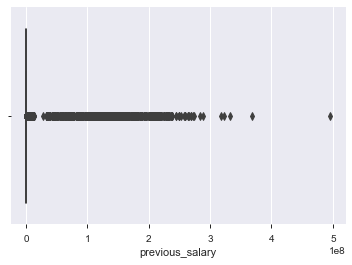

In [53]:
sns.boxplot(d.previous_salary)
plt.show()

In [54]:
d.wage_offer.fillna(d.previous_salary,inplace=True)

In [55]:
d.isnull().sum()

agent_state                           0
application_type                  95089
case_status                           0
class_of_admission                    0
country_of_citizenship                0
employer_num_employees           135349
employer_yr_estab                     0
employer_city                         0
employer_name                         0
employer_state                       42
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
job_work_state                        0
pv_unit_of_pay_9089                   0
previous_salary                       0
level                             27095
source_name                           0
sector                           236559
wage_offer                            0
wage_unit_of_pay                 115689
case_received_date_year               0
decision_date_year                    0


In [56]:
np.dtype(d.previous_salary)

dtype('float64')

In [57]:
d.previous_salary.median()


86501.0

In [58]:
d[d.wage_offer=="#############"]

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_work_state,pv_unit_of_pay_9089,previous_salary,level,source_name,sector,wage_offer,wage_unit_of_pay,case_received_date_year,decision_date_year
202865,West,ONLINE,Certified,H-1B,INDIA,596.0,New,Jersey City,"Brillio, LLC",NEW JERSEY,...,NEW JERSEY,Year,108763.0,Level III,OES,NaN,#############,Year,2015,2015
209472,Northeast,ONLINE,Withdrawn,E,AUSTRALIA,55.0,Old,Tuxedo Park,"Live Technology Holdings, Inc.",NEW YORK,...,NEVADA,Year,7036600.0,Level II,OES,NaN,#############,Year,2015,2015


In [59]:
d.wage_offer.replace("#############",90000,inplace=True)   #90000 is the median of this column

In [60]:
d["wage_offer"][d["wage_offer"]=="#############"]

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: wage_offer, dtype: float64)

### The columns previous_salary and wage_offer is the same for more than 95% of the rows. 
#### They are providing the same information. Thus ,we will make a new column which is their mean and drop the original columns after extracting information from them.

In [61]:
d['meansal']=(d.previous_salary+d.wage_offer)/2

In [62]:
d.drop(['previous_salary','wage_offer'],axis=1,inplace=True)
d.head()

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_training,job_work_state,pv_unit_of_pay_9089,level,source_name,sector,wage_unit_of_pay,case_received_date_year,decision_date_year,meansal
0,West,PERM,Certified,J,ARMENIA,NaN,New,NEW YORK,NETSOFT USA INC.,NY,...,NaN,NY,Year,Level II,OES,IT,Year,2007,2012,75629.000
1,West,PERM,Denied,B,POLAND,NaN,New,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,...,NaN,NY,Year,Level I,OES,Other Economic Sector,Year,2007,2011,37024.000
2,West,PERM,Certified,H-1B,INDIA,NaN,New,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,...,NaN,MD,Year,Level I,OES,Aerospace,Year,2007,2011,47923.000
3,West,PERM,Certified,B,SOUTH KOREA,NaN,New,FLUSHING,EBENEZER MISSION CHURCH,NY,...,NaN,NY,Year,Level II,OES,Other Economic Sector,Hour,2007,2011,10975.485
4,West,PERM,Certified,L,CANADA,NaN,New,ALBANY,ALBANY INTERNATIONAL CORP.,NY,...,NaN,NY,Year,Level IV,OES,Advanced Mfg,Year,2007,2012,97445.000


In [63]:
#Visualizing the outliers
d.meansal.describe()

count    3.656270e+05
mean     6.356744e+05
std      9.289730e+06
min      6.345000e+00
25%      7.038700e+04
50%      8.850650e+04
75%      1.079109e+05
max      4.957480e+08
Name: meansal, dtype: float64

In [64]:
q1=70387
q3=107910.9
iqr=round(q3-q1,2)
iqr

37523.9

In [65]:
q1=70387
q3=107910.9
iqr=round(q3-q1,2)
iqr
d[(d.meansal<q1-1.5*(iqr)) | (d.meansal > q3+1.5*(iqr))]

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_num_employees,employer_yr_estab,employer_city,employer_name,employer_state,...,job_training,job_work_state,pv_unit_of_pay_9089,level,source_name,sector,wage_unit_of_pay,case_received_date_year,decision_date_year,meansal
3,West,PERM,Certified,B,SOUTH KOREA,NaN,New,FLUSHING,EBENEZER MISSION CHURCH,NY,...,NaN,NY,Year,Level II,OES,Other Economic Sector,Hour,2007,2011,10975.485
9,West,PERM,Denied,E,PAKISTAN,NaN,New,BROOKLYN,"AMER BROTHERS INTERNATIONAL, INC.",NY,...,NaN,NY,Year,Level I,OES,Retail,Hour,2008,2012,12866.430
17,West,PERM,Certified,Unavailable,CANADA,NaN,New,JACKSON HEIGHTS,V.H.C. USA INCD/B/A VITAMIN HOMEOPTAHY CENTER,NY,...,NaN,NY,Year,Level III,OES,Retail,Hour,2008,2012,12066.250
18,West,PERM,Denied,EWI,MEXICO,NaN,New,LODI,"VITAMIA PASTA BOY, INC",NJ,...,NaN,NJ,Year,Level II,OES,Hospitality,Hour,2008,2011,10375.185
19,West,PERM,Certified,Unavailable,POLAND,NaN,New,EAST HAZEL CREST,REFIX TRUCK & TRAILER REPAIR,IL,...,NaN,IL,Year,Level I,OES,Automotive,Hour,2008,2011,10836.000
27,West,PERM,Denied,EWI,MEXICO,NaN,New,BROOKLYN,"L.A. BURRITO, INC",NY,...,NaN,NY,Year,Level III,OES,Hospitality,Hour,2008,2011,12906.450
31,West,PERM,Denied,EWI,MEXICO,NaN,New,STATEN ISLAND,"VICTORY PRODUCE,LLC. DBA TOP TOMATO",NY,...,NaN,NY,Year,Level I,OES,Retail,Hour,2008,2011,12236.115
35,West,PERM,Denied,EWI,ECUADOR,NaN,New,TUCKAHOE,ANGELINA'S RESTAURANT,NY,...,NaN,NY,Year,Level I,OES,Hospitality,Hour,2008,2012,9504.750
36,West,PERM,Withdrawn,EWI,EL SALVADOR,NaN,New,ASHLAND,"CREATIVE CONSERVATION COMPANY, INC.",VA,...,NaN,VA,Year,Level I,OES,Construction,Hour,2008,2012,10165.080
39,West,PERM,Denied,EWI,MEXICO,NaN,New,BLOOMFIELD,"PROPERTY SERVICES LANDSCAPING, INC",NJ,...,NaN,NY,Year,Level III,OES,Other Economic Sector,Hour,2008,2012,13196.595


In [66]:
us_state_abbrev = {k.upper(): v for k, v in state_abb.items()}
d['employer_state'].replace(us_state_abbrev, inplace=True)
d.employer_state = d.employer_state.astype(str)

d.employer_state.unique()

array(['NY', 'VA', 'FL', 'DE', 'MD', 'NJ', 'GA', 'IL', 'TX', 'KY', 'WY',
       'OH', 'MS', 'MA', 'NC', 'CA', 'MO', 'CT', 'AZ', 'WI', 'PA', 'WA',
       'CO', 'MN', 'NV', 'UT', 'AL', 'OK', 'LA', 'RI', 'DC', 'OR', 'MI',
       'IA', 'NH', 'IN', 'SD', 'nan', 'NE', 'KS', 'TN', 'PR', 'AR', 'GU',
       'WV', 'SC', 'ID', 'VI', 'ND', 'HI', 'VT', 'ME', 'NM', 'MP', 'AK',
       'MT', 'GUAM', 'MH', 'BRITISH COLUMBIA', 'BC'], dtype=object)

### Generalizing the states

In [67]:
regions = {
    'ME':'Northeast', 
    'NY':'Northeast', 
    'NJ':'Northeast', 
    'VT':'Northeast',
    'MA':'Northeast',
    'RI':'Northeast',
    'CT':'Northeast',
    'NH':'Northeast',
    'PA':'Northeast',
    'IL':'Midwest',
    'IN':'Midwest',
    'IA':'Midwest', 
    'KS':'Midwest',
    'MI':'Midwest', 
    'MN':'Midwest', 
    'MO':'Midwest', 
    'NE':'Midwest',
    'ND':'Midwest', 
    'OH':'Midwest', 
    'SD':'Midwest', 
    'WI':'Midwest',
    'DE':'South',
    'FL':'South', 
    'GA':'South',
    'MD':'South',
    'NC':'South',
    'SC':'South',
    'VA':'South',
    'WV':'South',
    'AL':'South',
    'KY':'South',
    'MS':'South',
    'TN':'South',
    'AR':'South',
    'LA':'South', 
    'OK':'South',
    'TX':'South',
    'MT':'West',
    'WY':'West', 
    'CO':'West', 
    'NM':'West', 
    'ID':'West', 
    'UT':'West', 
    'AZ':'West', 
    'NV':'West',
    'WA':'West', 
    'OR':'West', 
    'CA':'West', 
    'AK':'West',
    'HI':'West',
    'DC':'Other', 
    'GUAM':'Island',
    'GU':'Island',
    'PR':'Island', 
    'MP':'Island', 
    'VI':'Island',
    'BC':'Northeast',
    'BRITISH COLUMBIA':'Northeast',  
    'nan':'Other',
    'FEDERATED STATES OF MICRONESIA':'Other',
'MH':'Island'}

In [68]:
def region(x):
    return regions[x]

d['employer_state'] = d['employer_state'].apply(region)


In [69]:
d.employer_state.value_counts()

West         120731
South        101998
Northeast     89026
Midwest       51527
Other          1682
Island          663
Name: employer_state, dtype: int64

In [70]:
d.employer_state.replace('Other','West',inplace=True)

d.employer_state.value_counts(1)

West         0.334803
South        0.278967
Northeast    0.243489
Midwest      0.140928
Island       0.001813
Name: employer_state, dtype: float64

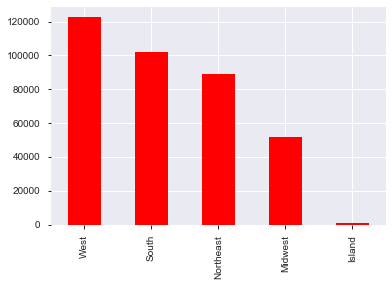

In [71]:
d.employer_state.value_counts().plot(kind='bar',color='red')

In [72]:
# Chi-Square Test
# Null hypothesis H0: There is no association between employer_state and case_status
# Alternate hypothesis H1: There is association between employer_state and case_status
em=pd.crosstab(d.case_status,d.employer_state)
stat, p, dof, expected=chi2_contingency(em)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

2.908515251328645e-278

In [73]:
us_state_abbrev = {k.upper(): v for k, v in state_abb.items()}
d['job_work_state'].replace(us_state_abbrev, inplace=True)
d.job_work_state = d.job_work_state.astype(str)

In [74]:
d.job_work_state.replace('Other','West',inplace=True)

In [75]:
def region(x):
    return regions[x]

d['job_work_state'] = d['job_work_state'].apply(region)


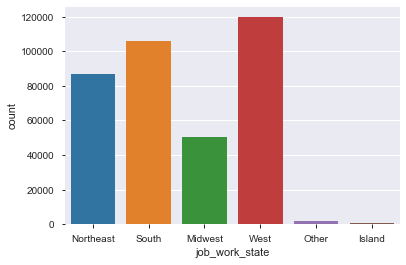

In [76]:
sns.countplot(d.job_work_state)
plt.show()

In [77]:
# Chi-Square Test
# Null hypothesis H0: There is no association between job_work_state and case_status
# Alternate hypothesis H1: There is association between job_work_state and case_status
jws=pd.crosstab(d.case_status,d.job_work_state)
stat, p, dof, expected=chi2_contingency(jws)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

9.43269504590687e-154

In [78]:
d.sector.isnull().sum()
#d.employer_num_employees.isnull().sum()

236559

#### Creating a new level for missing values 

In [79]:
d.sector.value_counts()

IT                       52617
Advanced Mfg             18749
Other Economic Sector    15798
Finance                   9224
Educational Services      9130
Health Care               6825
Retail                    4408
Aerospace                 4166
Hospitality               1926
Construction              1409
Automotive                1163
Energy                    1086
Transportation             949
Agribusiness               939
Biotechnology              456
Geospatial                 141
Homeland Security           82
Name: sector, dtype: int64

In [80]:
#d.sector.fillna("Unavailable",inplace=True)

In [81]:
d.sector.value_counts()

IT                       52617
Advanced Mfg             18749
Other Economic Sector    15798
Finance                   9224
Educational Services      9130
Health Care               6825
Retail                    4408
Aerospace                 4166
Hospitality               1926
Construction              1409
Automotive                1163
Energy                    1086
Transportation             949
Agribusiness               939
Biotechnology              456
Geospatial                 141
Homeland Security           82
Name: sector, dtype: int64

In [82]:
#d.sector.replace('Unavailable',np.nan,inplace=True)
d.sector.fillna('IT',limit=52617,inplace=True)
d.sector.fillna('Advanced Mfg',limit=18749,inplace=True)
d.sector.fillna('Other Economic Sector',limit=15798,inplace=True)
d.sector.fillna('Finance',limit=9224,inplace=True)
d.sector.fillna('Educational Services',limit=9130,inplace=True)
d.sector.fillna('Health Care',limit=6825,inplace=True)
d.sector.fillna('Retail',limit=4408,inplace=True)
d.sector.fillna('Aerospace',limit=4166,inplace=True)
d.sector.value_counts(1)

IT                       0.420961
Advanced Mfg             0.150001
Other Economic Sector    0.126392
Finance                  0.073796
Educational Services     0.073044
Health Care              0.054603
Retail                   0.035266
Aerospace                0.033330
Hospitality              0.007704
Construction             0.005636
Automotive               0.004652
Energy                   0.004344
Transportation           0.003796
Agribusiness             0.003756
Biotechnology            0.001824
Geospatial               0.000564
Homeland Security        0.000328
Name: sector, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

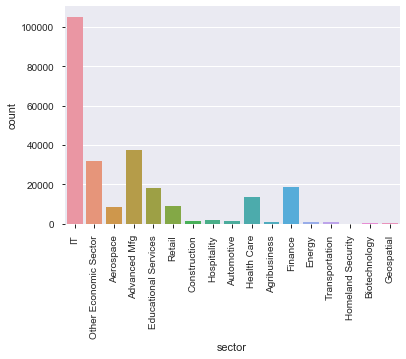

In [83]:
sns.countplot(d.sector)
plt.xticks(rotation=90)

In [84]:
# Chi-Square Test
# Null hypothesis H0: There is no association between sector and case_status
# Alternate hypothesis H1: There is association between sector and case_status
sec=pd.crosstab(d.case_status,d.sector)
stat, p, dof, expected=chi2_contingency(sec)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

0.0

In [85]:
d.employer_num_employees.describe()

count    2.302780e+05
mean     2.327626e+04
std      5.555383e+05
min      0.000000e+00
25%      6.800000e+01
50%      1.078000e+03
75%      1.480000e+04
max      2.635506e+08
Name: employer_num_employees, dtype: float64

### Binning the number of employees to depict the size of the enterprise.

In [86]:
pd.qcut(d.employer_num_employees,q=[0.25,0.5,0.75])

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6                       NaN
7                       NaN
8                       NaN
9                       NaN
10                      NaN
11                      NaN
12                      NaN
13                      NaN
14                      NaN
15                      NaN
16                      NaN
17                      NaN
18                      NaN
19                      NaN
20                      NaN
21                      NaN
22                      NaN
23                      NaN
24                      NaN
25                      NaN
26                      NaN
27                      NaN
28                      NaN
29                      NaN
                ...        
374332                  NaN
374333    (1078.0, 14800.0]
374334                  NaN
374335    (1078.0, 14800.0]
374336     (67.999, 

#### Creating a new level for missing values by first imputing it to 0 .

In [87]:
d.employer_num_employees.isnull().sum()
d.employer_num_employees.fillna(0,inplace=True)

In [88]:
def emp(x):
    if x==0:
        return "Unvailable"
    elif x<68 and x>0:
        return "Small"
    elif x<14800 and x>1078:
        return "Medium"
    else:
        return "Large"
    
d['Enterprise_Size']=d.employer_num_employees.apply(emp)

In [89]:
d.Enterprise_Size.value_counts()

Unvailable    135607
Large         115284
Medium         57512
Small          57224
Name: Enterprise_Size, dtype: int64

In [90]:
d.Enterprise_Size.replace('Unvailable',np.nan,inplace=True)
d.Enterprise_Size.fillna("Large",limit=115284,inplace=True)
d.Enterprise_Size.fillna('Medium', limit=57512,inplace=True)
d.Enterprise_Size.fillna('Small', limit=57224,inplace=True)
d.Enterprise_Size.value_counts(1)

Large     0.630610
Medium    0.212881
Small     0.156509
Name: Enterprise_Size, dtype: float64

In [91]:
# Chi-Square Test
# Null hypothesis H0: There is no association between Enterprise_Size and case_status
# Alternate hypothesis H1: There is association between Enterprise_Size and case_status
ent=pd.crosstab(d.case_status,d.Enterprise_Size)
stat, p, dof, expected=chi2_contingency(ent)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

0.0

In [92]:
d.isnull().sum()

agent_state                           0
application_type                  95089
case_status                           0
class_of_admission                    0
country_of_citizenship                0
employer_num_employees                0
employer_yr_estab                     0
employer_city                         0
employer_name                         0
employer_state                        0
foreign_worker_info_education    135308
foreign_worker_info_major        151662
job_experience                   135281
job_title                        135313
job_training                     135284
job_work_state                        0
pv_unit_of_pay_9089                   0
level                             27095
source_name                           0
sector                           115642
wage_unit_of_pay                 115689
case_received_date_year               0
decision_date_year                    0
meansal                               0
Enterprise_Size                       0


In [93]:
print(d.foreign_worker_info_education.unique())
print(d.foreign_worker_info_education.value_counts())

[nan "Bachelor's" 'None' 'Doctorate' "Master's" 'Other' 'High School'
 "Associate's"]
Master's       102056
Bachelor's      84318
None            15171
Doctorate       12227
Other           10074
High School      4144
Associate's      2329
Name: foreign_worker_info_education, dtype: int64


In [94]:
d.foreign_worker_info_education.replace('None',np.nan,inplace=True)
d.foreign_worker_info_education.replace('Other',np.nan,inplace=True)
d.foreign_worker_info_education.fillna("Master's",limit=102056,inplace=True) 
d.foreign_worker_info_education.fillna("Bachelor's",limit=84318,inplace=True) 
d.foreign_worker_info_education.fillna("Doctorate",limit=12227,inplace=True) 
d.foreign_worker_info_education.fillna("Master's",limit=102056,inplace=True) 
d.foreign_worker_info_education.fillna("High School",limit=4144,inplace=True) 
d.foreign_worker_info_education.fillna("Associate's",limit=2329,inplace=True) 

In [95]:
# Chi-Square Test
# Null hypothesis H0: There is no association between foreign_worker_info_education and case_status
# Alternate hypothesis H1: There is association between foreign_worker_info_education and case_status
fo=pd.crosstab(d.case_status,d.foreign_worker_info_education)
stat, p, dof, expected=chi2_contingency(fo)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

0.0

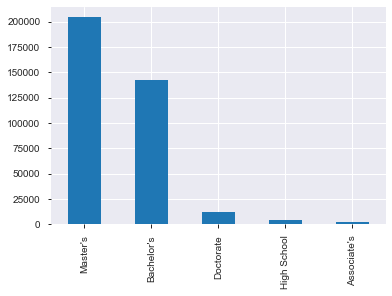

In [96]:
d.foreign_worker_info_education.value_counts().plot(kind='bar')

In [97]:
# Chi-Square Test
# Null hypothesis H0: There is no association between foreign_worker_info_major and case_status
# Alternate hypothesis H1: There is association between foreign_worker_info_major and case_status
fom=pd.crosstab(d.case_status,d.foreign_worker_info_major)
stat, p, dof, expected=chi2_contingency(fom)
p    
# Since p value < alpha (0.05) ,we reject the null hypothesis

0.0

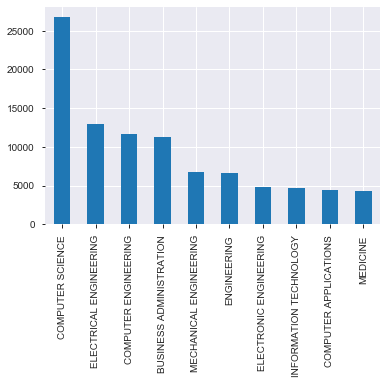

In [98]:
d.foreign_worker_info_major.value_counts().head(10).plot(kind='bar')
plt.show()

In [99]:
d.foreign_worker_info_major.nunique()

21851

In [100]:
d.foreign_worker_info_major=d.foreign_worker_info_major.astype('str')

#### We have 21k+ unique values here. They are a huge range of the employees details and has redundancy as well.

In [101]:
strg ='ENGINEER'
for i in d.foreign_worker_info_major:
    if strg in i:
        d.foreign_worker_info_major.replace(i,'Engineer',inplace=True)


In [102]:
strng='COMPUTER'
for i in d.foreign_worker_info_major:
    if strng in i:
        d.foreign_worker_info_major.replace(i,'Computer Applications',inplace=True)
    else:
        pass

In [103]:
strng='ADMIN'
for i in d.foreign_worker_info_major:
    if strng in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Business Administration',inplace=True)
    else:
        pass

In [104]:
str1='INFORMATION TECHNOLOGY'
for i in d.foreign_worker_info_major:
    if str1 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Information Technology',inplace=True)
    else:
        pass

In [105]:
str2='MEDICINE'
for i in d.foreign_worker_info_major:
    if str2 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Medicine',inplace=True)
    else:
        pass

In [106]:
str3='ACCOUNTING'
for i in d.foreign_worker_info_major:
    if str3 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Accounting',inplace=True)
    else:
        pass

In [107]:
str4='INFORMATION SYSTEM'
for i in d.foreign_worker_info_major:
    if str4 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Information Systems',inplace=True)
    else:
        pass

In [108]:
str5='ECONOMICS'
for i in d.foreign_worker_info_major:
    if str5 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Economics',inplace=True)
    else:
        pass

In [109]:
str6='MATH'
for i in d.foreign_worker_info_major:
    if str6 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Mathematics',inplace=True)
    else:
        pass

In [110]:
str7='PHYSICS'
for i in d.foreign_worker_info_major:
    if str7 in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Physics',inplace=True)
    else:
        pass

In [111]:
d.foreign_worker_info_major.nunique()

9754

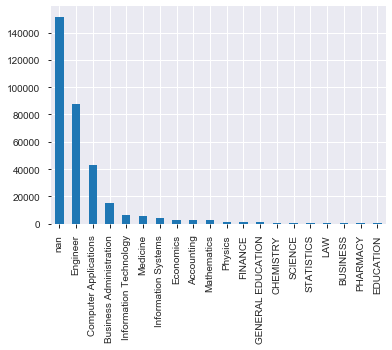

In [112]:
d.foreign_worker_info_major.value_counts().head(20).plot(kind='bar')
plt.show()

In [113]:
d.foreign_worker_info_major.value_counts().head(10)

nan                        151662
Engineer                    87470
Computer Applications       43247
Business Administration     15132
Information Technology       6575
Medicine                     5393
Information Systems          4380
Economics                    2729
Accounting                   2695
Mathematics                  2625
Name: foreign_worker_info_major, dtype: int64

In [114]:
d.foreign_worker_info_major.isnull().sum()

0

In [115]:
d.foreign_worker_info_major.replace('nan',np.nan,inplace=True)

In [116]:
d.foreign_worker_info_major.isnull().sum()

151662

In [117]:
d.foreign_worker_info_major.fillna('Engineer',limit=87470,inplace=True)
d.foreign_worker_info_major.fillna('Computer Applications',limit=43247,inplace=True)
d.foreign_worker_info_major.fillna('Information Technology',limit=15132,inplace=True)
d.foreign_worker_info_major.fillna('Medicine',limit=5393,inplace=True)
d.foreign_worker_info_major.fillna('Information Systems',limit=4380,inplace=True)


In [118]:
d.foreign_worker_info_major.isnull().sum()
d.foreign_worker_info_major.nunique()

9753

In [119]:
t='HELLO'
t.isupper()

True

In [120]:
for i in d.foreign_worker_info_major:
    if i.isupper()==True:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Other',inplace=True)
    else:
        pass

In [121]:
v='---'
for i in d.foreign_worker_info_major:
    if v in i:
        #print(i)
        d.foreign_worker_info_major.replace(i,'Other',inplace=True)
    else:
        pass
d.foreign_worker_info_major.replace('9456593927','Other',inplace=True)
d.foreign_worker_info_major.replace('EQUIVALENCY TO A US BACHELORâ€™S DEGREE, PER COMBINED EDUCATION & EXPERIENCE','Other',inplace=True)
d.foreign_worker_info_major.replace('MEDICAL IMAGING AND RADIATION SCIENCES â€“ SONOGRAPHY','Other',inplace=True)
d.foreign_worker_info_major.replace('ELECTRONICS â€“ TELECOMMUNICATIONS','Other',inplace=True)
d.foreign_worker_info_major.replace('MBA WITH COURSES IN FINANCIAL MNGMNT AND INTâ€™L MACROECONOMY','Other',inplace=True)
d.foreign_worker_info_major.replace('COUNSELING â€“ MARRIAGE AND FAMILY THERAPY','Other',inplace=True)
d.foreign_worker_info_major.replace('Financial Engineering','Engineer',inplace=True)
d.foreign_worker_info_major.replace('ELECTRICAL ENGâ€™G','Engineer',inplace=True)
d.foreign_worker_info_major.replace('9420662327','Other',inplace=True)
d.foreign_worker_info_major.replace('WOMANâ€™S CULTURE','Other',inplace=True)

In [122]:
d.foreign_worker_info_major.unique()

array(['Engineer', 'Computer Applications', 'Information Technology',
       'Other', 'Business Administration', 'Medicine',
       'Information Systems', 'Accounting', 'Economics', 'Physics',
       'Mathematics'], dtype=object)

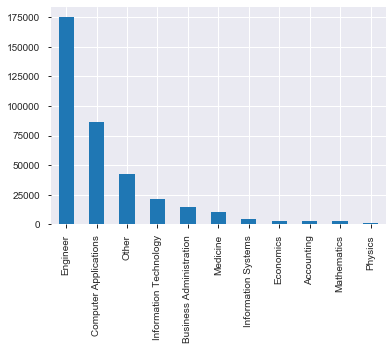

In [123]:
d.foreign_worker_info_major.value_counts().plot(kind='bar')
plt.show()

In [124]:
print(d.job_experience.value_counts())
d.job_experience.isnull().sum()

Y    128554
N    101792
Name: job_experience, dtype: int64


135281

In [125]:
d.job_experience.fillna('Y',limit=128554,inplace=True) 
d.job_experience.fillna('N',limit=101792,inplace=True) 
d.job_experience.isnull().sum()

0

In [126]:
d.isnull().sum()[d.isnull().sum()>0]

application_type     95089
job_title           135313
job_training        135284
level                27095
sector              115642
wage_unit_of_pay    115689
dtype: int64

In [127]:
d.job_title.value_counts(1)   ## 59k unique values
d.job_title.isnull().sum()
d.job_title.fillna('Other',inplace=True)
d.job_title=d.job_title.astype('str')

In [128]:
d.job_title.unique()

array(['Other', 'Senior Engineer', 'Catfish Processor', ...,
       'Computer Systems Analyst, Data Integration',
       'Senior .NET Developer(s)',
       'Assistant Vice President, Divisional Business Information Security Officer'],
      dtype=object)

In [129]:
# strg ='Engineer'
# for i in d.job_title:
#     if strg in i:
#         d.job_title.replace(i,'Engineer',inplace=True)

In [130]:
d.job_title.nunique()

59496

In [131]:
d.drop('job_title',axis=1,inplace=True)   

In [132]:
d.job_training.value_counts()

N    226021
Y      4322
Name: job_training, dtype: int64

In [133]:
d.job_training.fillna('N',limit=226021,inplace=True)  
d.job_training.fillna('Y',limit=4322,inplace=True)  

In [134]:
d.drop('wage_unit_of_pay',axis=1,inplace=True)   ### It is the same as pv_unit_of_pay

In [135]:
d.isnull().sum()

agent_state                           0
application_type                  95089
case_status                           0
class_of_admission                    0
country_of_citizenship                0
employer_num_employees                0
employer_yr_estab                     0
employer_city                         0
employer_name                         0
employer_state                        0
foreign_worker_info_education         0
foreign_worker_info_major             0
job_experience                        0
job_training                          0
job_work_state                        0
pv_unit_of_pay_9089                   0
level                             27095
source_name                           0
sector                           115642
case_received_date_year               0
decision_date_year                    0
meansal                               0
Enterprise_Size                       0
dtype: int64

In [136]:
d.isnull().sum()

agent_state                           0
application_type                  95089
case_status                           0
class_of_admission                    0
country_of_citizenship                0
employer_num_employees                0
employer_yr_estab                     0
employer_city                         0
employer_name                         0
employer_state                        0
foreign_worker_info_education         0
foreign_worker_info_major             0
job_experience                        0
job_training                          0
job_work_state                        0
pv_unit_of_pay_9089                   0
level                             27095
source_name                           0
sector                           115642
case_received_date_year               0
decision_date_year                    0
meansal                               0
Enterprise_Size                       0
dtype: int64

In [137]:
d.sector.value_counts()

IT                       105234
Advanced Mfg              37498
Other Economic Sector     31596
Finance                   18448
Educational Services      18260
Health Care               13650
Retail                     8816
Aerospace                  8332
Hospitality                1926
Construction               1409
Automotive                 1163
Energy                     1086
Transportation              949
Agribusiness                939
Biotechnology               456
Geospatial                  141
Homeland Security            82
Name: sector, dtype: int64

In [138]:
d.level.value_counts()

Level II     117942
Level IV      93727
Level III     64438
Level I       62425
Name: level, dtype: int64

In [139]:
d.level.fillna('Level II',limit=117942,inplace=True) 
d.level.fillna('Level IV',limit=93727,inplace=True) 
d.level.isnull().sum()

0

In [140]:
d['continent']= d.country_of_citizenship
d.continent=d.continent.replace({'ARMENIA':"ASIA",'ARMENIA':"ASIA",'INDIA':"ASIA",'SOUTH KOREA':"ASIA",
                                         'PAKISTAN':"ASIA", 'SINGAPORE':"ASIA", 'RUSSIA':"ASIA",'JAPAN':"ASIA",'CHINA':"ASIA",
                                         'PHILIPPINES':"ASIA",'TURKEY':"ASIA",'VIETNAM':"ASIA",'IRAN':"ASIA",
                                         'INDONESIA':"ASIA",'BANGLADESH':"ASIA", 'MONGOLIA':"ASIA",'ISRAEL':"ASIA",
                                         'TAIWAN':"ASIA",'NEPAL':"ASIA",'MALAYSIA':"ASIA", 'UNITED ARAB EMIRATES':"ASIA",
                                         'SRI LANKA':"ASIA",'HONG KONG':"ASIA", 'KUWAIT':"ASIA",'LEBANON':"ASIA",
                                         'JORDAN':"ASIA",'THAILAND':"ASIA",'BURKINA FASO':"ASIA",'SYRIA':"ASIA", 'LAOS':"ASIA",
                                         'CAMBODIA':"ASIA",'KYRGYZSTAN':"ASIA", 'TURKMENISTAN':"ASIA", 'BURMA (MYANMAR)':"ASIA",
                                         'AFGHANISTAN':"ASIA",'CYPRUS':"ASIA",'BHUTAN':"ASIA", 'NORTH KOREA':"ASIA",
                                         'AZERBAIJAN':"ASIA", 'OMAN':"ASIA",'BAHRAIN':"ASIA", 'KAZAKHSTAN':"ASIA",
                                         'UZBEKISTAN':"ASIA",'PALESTINE':"ASIA",'SAUDI ARABIA':"ASIA",'YEMEN':"ASIA",
                                         'IRAQ':"ASIA",'TAJIKISTAN':"ASIA",'MALDIVES':"ASIA", 'MACAU':"ASIA",
                                         'PALESTINIAN TERRITORIES':"ASIA",'QATAR':"ASIA",'BRUNEI':"ASIA"})
d.continent=d.continent.replace({'SOUTH AFRICA':"AFRICA", 'CAMEROON':"AFRICA",'MOROCCO':"AFRICA",'NIGERIA':"AFRICA",
                                         'EGYPT':"AFRICA",'KENYA':"AFRICA",'IVORY COAST':"AFRICA",'GHANA':"AFRICA",
                                         'ZAMBIA':"AFRICA",'MALI':"AFRICA",'ZIMBABWE':"AFRICA", 'MAURITIUS':"AFRICA",
                                         'SENEGAL':"AFRICA",'GUINEA':"AFRICA",'ETHIOPIA':"AFRICA",'TUNISIA':"AFRICA",
                                         'SUDAN':"AFRICA",'TANZANIA':"AFRICA",'UGANDA':"AFRICA", 'LIBYA':"AFRICA",
                                         'RWANDA':"AFRICA",'LIBERIA':"AFRICA",'SIERRA LEONE':"AFRICA",'GAMBIA':"AFRICA",
                                         'TOGO':"AFRICA",'ANGOLA':"AFRICA",'LESOTHO':"AFRICA", 'BURUNDI':"AFRICA",
                                         'GABON':"AFRICA", 'DEMOCRATIC REPUBLIC OF CONGO':"AFRICA", 
                                         'CENTRAL AFRICAN REPUBLIC':"AFRICA",'MADAGASCAR':"AFRICA",'MOZAMBIQUE':"AFRICA",
                                         'BOTSWANA':"AFRICA",'BENIN':"AFRICA",'NIGER':"AFRICA",'ALGERIA':"AFRICA",
                                         'ERITREA':"AFRICA",'MALAWI':"AFRICA", 'NAMIBIA':"AFRICA",'MAURITANIA':"AFRICA",
                                         "COTE d'IVOIRE":"AFRICA",'SAO TOME AND PRINCIPE':"AFRICA",'GUINEA-BISSAU':"AFRICA",
                                         'SEYCHELLES':"AFRICA",'SOUTH SUDAN':"AFRICA", 'EQUATORIAL GUINEA':"AFRICA",
                                         'REPUBLIC OF CONGO':"AFRICA",'SOMALIA':"AFRICA",'SWAZILAND':"AFRICA",
                                         'CAPE VERDE':"AFRICA",'CHAD':"AFRICA",'COMOROS':"AFRICA"})
d.continent = d.continent.replace({'POLAND':"EUROPE",'SWEDEN':"EUROPE", 'PORTUGAL':"EUROPE",'SPAIN':"EUROPE",
                                           'AUSTRIA':"EUROPE",'ITALY':"EUROPE", 'IRELAND':"EUROPE", 'BULGARIA':"EUROPE",
                                           'UNITED KINGDOM':"EUROPE",'SLOVAKIA':"EUROPE",'ROMANIA':"EUROPE", 'UKRAINE':"EUROPE",
                                           'HUNGARY':"EUROPE", 'MACEDONIA':"EUROPE",'GERMANY':"EUROPE",'MOLDOVA':"EUROPE",
                                           'NETHERLANDS':"EUROPE",'GREECE':"EUROPE",'SERBIA AND MONTENEGRO':"EUROPE",
                                           'SWITZERLAND':"EUROPE",'SLOVENIA':"EUROPE",'BELARUS':"EUROPE",
                                           'CZECH REPUBLIC':"EUROPE",'BELGIUM':"EUROPE",'ALBANIA':"EUROPE",'ESTONIA':"EUROPE",
                                           'DENMARK':"EUROPE",'NORWAY':"EUROPE",'LITHUANIA':"EUROPE", 'FINLAND':"EUROPE",
                                           'LATVIA':"EUROPE",'BOSNIA AND HERZEGOVINA':"EUROPE",'YUGOSLAVIA':"EUROPE",
                                           'CROATIA':"EUROPE",'MALTA':"EUROPE",'ICELAND':"EUROPE", 'KOSOVO':"EUROPE",
                                           'LUXEMBOURG':"EUROPE",'SERBIA':"EUROPE",'MONTENEGRO':"EUROPE",'MONACO':"EUROPE",
                                           'LIECHTENSTEIN':"EUROPE",'ANDORRA':"EUROPE",'SOVIET UNION':"EUROPE"})
d.continent = d.continent.replace({'CANADA':"North America",'MEXICO':"North America",'VENEZUELA':"North America",
                                           'EL SALVADOR':"North America", 'JAMAICA':"North America", 
                                           'TRINIDAD AND TOBAGO':"North America",'GUATEMALA':"North America",
                                           'UNITED STATES OF AMERICA':"North America",'BOLIVIA':"North America",
                                           'DOMINICAN REPUBLIC':"North America", 'FRANCE':"North America",
                                           'PANAMA':"North America",'COSTA RICA':"North America",'BARBADOS':"North America", 
                                           'GRENADA':"North America", 'HONDURAS':"North America",'BELIZE':"North America",
                                           'DOMINICA':"North America",'ST VINCENT':"North America", 'NICARAGUA':"North America",
                                           'ST LUCIA':"North America",'URUGUAY':"North America",'BAHAMAS':"North America",
                                           'ST KITTS AND NEVIS':"North America", 'HAITI':"North America",
                                           'CAYMAN ISLANDS':"North America", 'BERMUDA':"North America",'ARUBA':"North America",
                                           'TURKS AND CAICOS ISLANDS':"North America",'ANTIGUA AND BARBUDA':"North America",
                                           'SAINT VINCENT AND THE GRENADINES':"North America",
                                           'BRITISH VIRGIN ISLANDS':"North America",'CUBA':"North America",
                                           'SINT MAARTEN':"North America"})
d.continent = d.continent.replace({'ECUADOR':"South America",'COLOMBIA':"South America",'BRAZIL':"South America",
                                           'ARGENTINA':"South America", 'PERU':"South America",'PARAGUAY':"South America",
                                           'CHILE':"South America",'GEORGIA':"South America",'GUYANA':"South America",
                                           'SURINAME':"South America", 'NETHERLANDS ANTILLES':"South America"})
d.continent = d.continent.replace({'AUSTRALIA':"Oceania",'NEW ZEALAND':"Oceania",'FIJI':"Oceania",
                                           'PAPUA NEW GUINEA':"Oceania",'VANUATU':"Oceania",'MARSHALL ISLANDS':"Oceania",
                                           'KIRIBATI':"Oceania",'SAMOA':"Oceania"})


In [141]:

d.continent=d.continent.replace({'ARMENIA':"asia",'ARMENIA':"asia",'INDIA':"asia",'SOUTH KOREA':"asia",
                                         'PAKISTAN':"asia", 'SINGAPORE':"asia", 'RUSSIA':"asia",'JAPAN':"asia",'CHINA':"asia",
                                         'PHILIPPINES':"asia",'TURKEY':"asia",'VIETNAM':"asia",'IRAN':"asia",
                                         'INDONESIA':"asia",'BANGLADESH':"asia", 'MONGOLIA':"asia",'ISRAEL':"asia",
                                         'TAIWAN':"asia",'NEPAL':"asia",'MALAYSIA':"asia", 'UNITED ARAB EMIRATES':"asia",
                                         'SRI LANKA':"asia",'HONG KONG':"asia", 'KUWAIT':"asia",'LEBANON':"asia",
                                         'JORDAN':"asia",'THAILAND':"asia",'BURKINA FASO':"asia",'SYRIA':"asia", 'LAOS':"asia",
                                         'CAMBODIA':"asia",'KYRGYZSTAN':"asia", 'TURKMENISTAN':"asia", 'BURMA (MYANMAR)':"asia",
                                         'AFGHANISTAN':"asia",'CYPRUS':"asia",'BHUTAN':"asia", 'NORTH KOREA':"asia",
                                         'AZERBAIJAN':"asia", 'OMAN':"asia",'BAHRAIN':"asia", 'KAZAKHSTAN':"asia",
                                         'UZBEKISTAN':"asia",'PALESTINE':"asia",'SAUDI ARABIA':"asia",'YEMEN':"asia",
                                         'IRAQ':"asia",'TAJIKISTAN':"asia",'MALDIVES':"asia", 'MACAU':"asia",
                                         'PALESTINIAN TERRITORIES':"asia",'QATAR':"asia",'BRUNEI':"asia"})

In [142]:
d.continent=d.continent.replace({'SOUTH AFRICA':"africa", 'CAMEROON':"africa",'MOROCCO':"africa",'NIGERIA':"africa",
                                         'EGYPT':"africa",'KENYA':"africa",'IVORY COAST':"africa",'GHANA':"africa",
                                         'ZAMBIA':"africa",'MALI':"africa",'ZIMBABWE':"africa", 'MAURITIUS':"africa",
                                         'SENEGAL':"africa",'GUINEA':"africa",'ETHIOPIA':"africa",'TUNISIA':"africa",
                                         'SUDAN':"africa",'TANZANIA':"africa",'UGANDA':"africa", 'LIBYA':"africa",
                                         'RWANDA':"africa",'LIBERIA':"africa",'SIERRA LEONE':"africa",'GAMBIA':"africa",
                                         'TOGO':"africa",'ANGOLA':"africa",'LESOTHO':"africa", 'BURUNDI':"africa",
                                         'GABON':"africa", 'DEMOCRATIC REPUBLIC OF CONGO':"africa", 
                                         'CENTRAL AFRICAN REPUBLIC':"africa",'MADAGASCAR':"africa",'MOZAMBIQUE':"africa",
                                         'BOTSWANA':"africa",'BENIN':"africa",'NIGER':"africa",'ALGERIA':"africa",
                                         'ERITREA':"africa",'MALAWI':"africa", 'NAMIBIA':"africa",'MAURITANIA':"africa",
                                         "COTE d'IVOIRE":"africa",'SAO TOME AND PRINCIPE':"africa",'GUINEA-BISSAU':"africa",
                                         'SEYCHELLES':"africa",'SOUTH SUDAN':"africa", 'EQUATORIAL GUINEA':"africa",
                                         'REPUBLIC OF CONGO':"africa",'SOMALIA':"africa",'SWAZILAND':"africa",
                                         'CAPE VERDE':"africa",'CHAD':"africa",'COMOROS':"africa"})

In [143]:
d.continent = d.continent.replace({'POLAND':"europe",'SWEDEN':"europe", 'PORTUGAL':"europe",'SPAIN':"europe",
                                           'AUSTRIA':"europe",'ITALY':"europe", 'IRELAND':"europe", 'BULGARIA':"europe",
                                           'UNITED KINGDOM':"europe",'SLOVAKIA':"europe",'ROMANIA':"europe", 'UKRAINE':"europe",
                                           'HUNGARY':"europe", 'MACEDONIA':"europe",'GERMANY':"europe",'MOLDOVA':"europe",
                                           'NETHERLANDS':"europe",'GREECE':"europe",'SERBIA AND MONTENEGRO':"europe",
                                           'SWITZERLAND':"europe",'SLOVENIA':"europe",'BELARUS':"europe",
                                           'CZECH REPUBLIC':"europe",'BELGIUM':"europe",'ALBANIA':"europe",'ESTONIA':"europe",
                                           'DENMARK':"europe",'NORWAY':"europe",'LITHUANIA':"europe", 'FINLAND':"europe",
                                           'LATVIA':"europe",'BOSNIA AND HERZEGOVINA':"europe",'YUGOSLAVIA':"europe",
                                           'CROATIA':"europe",'MALTA':"europe",'ICELAND':"europe", 'KOSOVO':"europe",
                                           'LUXEMBOURG':"europe",'SERBIA':"europe",'MONTENEGRO':"europe",'MONACO':"europe",
                                           'LIECHTENSTEIN':"europe",'ANDORRA':"europe",'SOVIET UNION':"europe"})

In [144]:
d.continent = d.continent.replace({'CANADA':"North America",'MEXICO':"North America",'VENEZUELA':"North America",
                                           'EL SALVADOR':"North America", 'JAMAICA':"North America", 
                                           'TRINIDAD AND TOBAGO':"North America",'GUATEMALA':"North America",
                                           'UNITED STATES OF AMERICA':"North America",'BOLIVIA':"North America",
                                           'DOMINICAN REPUBLIC':"North America", 'FRANCE':"North America",
                                           'PANAMA':"North America",'COSTA RICA':"North America",'BARBADOS':"North America", 
                                           'GRENADA':"North America", 'HONDURAS':"North America",'BELIZE':"North America",
                                           'DOMINICA':"North America",'ST VINCENT':"North America", 'NICARAGUA':"North America",
                                           'ST LUCIA':"North America",'URUGUAY':"North America",'BAHAMAS':"North America",
                                           'ST KITTS AND NEVIS':"North America", 'HAITI':"North America",
                                           'CAYMAN ISLANDS':"North America", 'BERMUDA':"North America",'ARUBA':"North America",
                                           'TURKS AND CAICOS ISLANDS':"North America",'ANTIGUA AND BARBUDA':"North America",
                                           'SAINT VINCENT AND THE GRENADINES':"North America",
                                           'BRITISH VIRGIN ISLANDS':"North America",'CUBA':"North America",
                                           'SINT MAARTEN':"North America"})

In [145]:
d.continent = d.continent.replace({'ECUADOR':"South America",'COLOMBIA':"South America",'BRAZIL':"South America",
                                           'ARGENTINA':"South America", 'PERU':"South America",'PARAGUAY':"South America",
                                           'CHILE':"South America",'GEORGIA':"South America",'GUYANA':"South America",
                                           'SURINAME':"South America", 'NETHERLANDS ANTILLES':"South America"})

In [146]:
d.continent = d.continent.replace({'AUSTRALIA':"Oceania",'NEW ZEALAND':"Oceania",'FIJI':"Oceania",
                                           'PAPUA NEW GUINEA':"Oceania",'VANUATU':"Oceania",'MARSHALL ISLANDS':"Oceania",
                                           'KIRIBATI':"Oceania",'SAMOA':"Oceania"})


In [147]:
d.continent.value_counts()

ASIA             294092
North America     34066
EUROPE            21811
South America      8239
AFRICA             5305
Oceania            2114
Name: continent, dtype: int64

In [148]:
d.continent.replace('asia','Asia',inplace=True)
d.continent.replace('europe','Europe',inplace=True)
d.continent.replace('africa','Africa',inplace=True)

In [149]:
d.continent.value_counts()

ASIA             294092
North America     34066
EUROPE            21811
South America      8239
AFRICA             5305
Oceania            2114
Name: continent, dtype: int64

In [150]:
d.isnull().sum()

agent_state                           0
application_type                  95089
case_status                           0
class_of_admission                    0
country_of_citizenship                0
employer_num_employees                0
employer_yr_estab                     0
employer_city                         0
employer_name                         0
employer_state                        0
foreign_worker_info_education         0
foreign_worker_info_major             0
job_experience                        0
job_training                          0
job_work_state                        0
pv_unit_of_pay_9089                   0
level                                 0
source_name                           0
sector                           115642
case_received_date_year               0
decision_date_year                    0
meansal                               0
Enterprise_Size                       0
continent                             0
dtype: int64

#### The unknown level of job has the highest salary!

#### Visualizing the columns

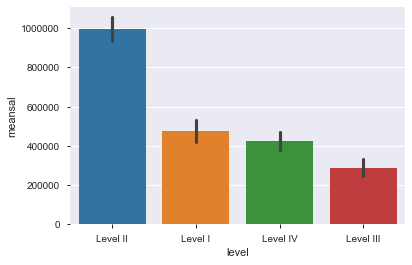

In [151]:
sns.barplot(d.level,d.meansal)

### Level 2 has highest salary

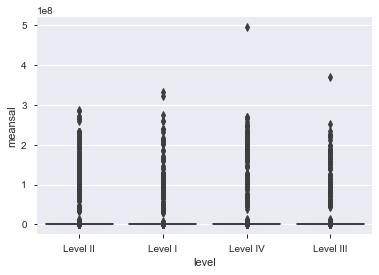

In [152]:
sns.boxplot(d.level,d.meansal)

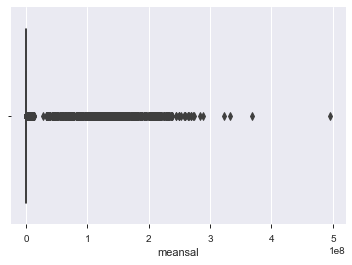

In [153]:
sns.boxplot(d.meansal)
plt.show()

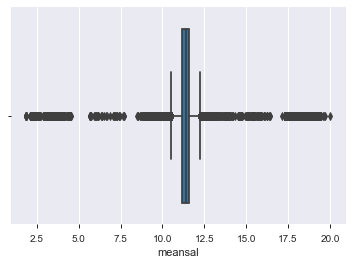

In [154]:
sns.boxplot(np.log(d.meansal))
plt.show()

#### We have many outliers in the meansal column.

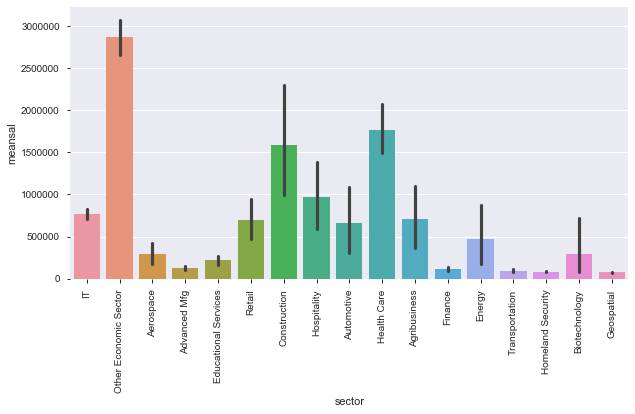

In [155]:
plt.figure(figsize=(10,5))
sns.barplot(d.sector,d.meansal)
plt.xticks(rotation=90)
plt.show()

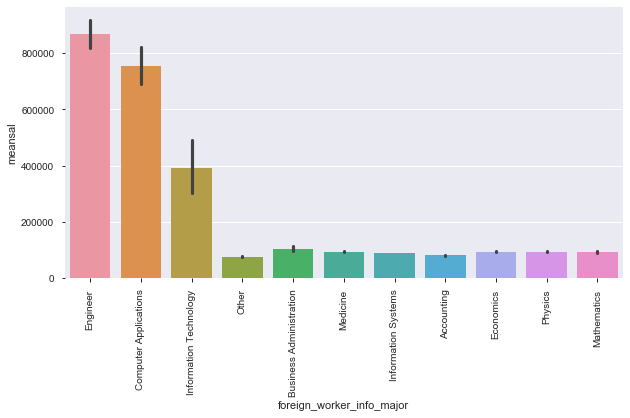

In [156]:
plt.figure(figsize=(10,5))
sns.barplot(d.foreign_worker_info_major,d.meansal)
plt.xticks(rotation=90)
plt.show()

In [157]:
q1=70387
q3=107910.9
iqr=round(q3-q1,2)
iqr
work=d[['meansal','foreign_worker_info_major']][(d.meansal<q1-1.5*(iqr)) | (d.meansal > q3+1.5*(iqr))]

In [158]:
work.foreign_worker_info_major.value_counts()    # no. of outliers from each field

Engineer                   4488
Medicine                   3318
Other                      2290
Computer Applications      2005
Information Technology     1845
Business Administration     850
Economics                   226
Information Systems         109
Accounting                  103
Mathematics                  95
Physics                      37
Name: foreign_worker_info_major, dtype: int64

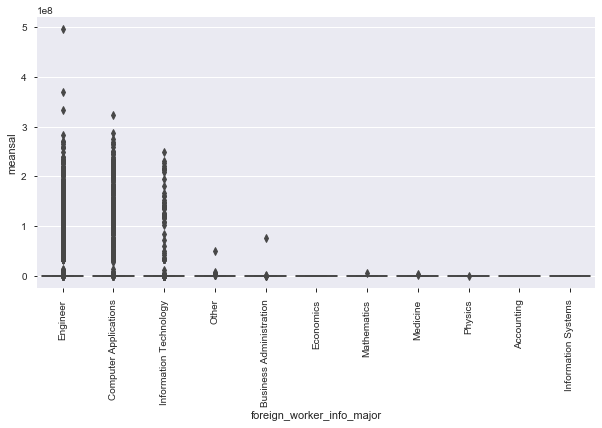

In [159]:
plt.figure(figsize=(10,5))
sns.boxplot(work.foreign_worker_info_major,work.meansal,whis=5.5)
plt.xticks(rotation=90)
plt.show()

In [160]:
engin=d[d.foreign_worker_info_major=='Engineer']

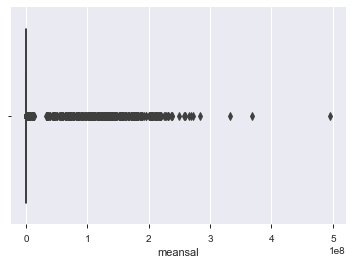

In [161]:
sns.boxplot(engin.meansal,whis=6.5)
plt.show()

### Economic Sector and Healthcare have highest salaries in terms of sector

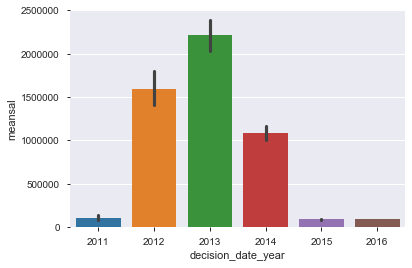

In [162]:
sns.barplot(d.decision_date_year,d.meansal)

### In year 2012 and 2013 , employees had highest wages

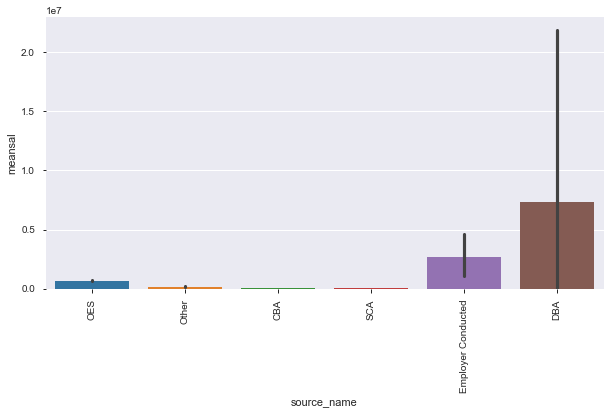

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(d.source_name,d.meansal)
plt.xticks(rotation=90)
plt.show()

### Applications with source_name DBA have highest salary

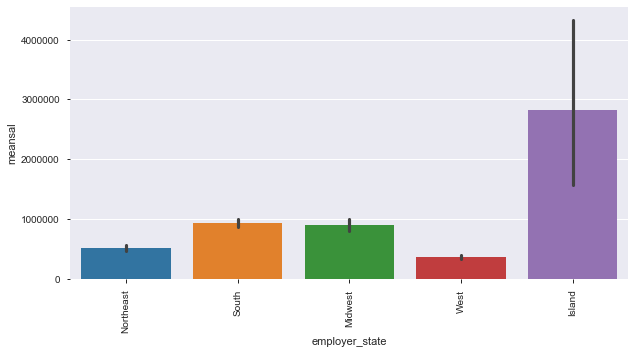

In [164]:
plt.figure(figsize=(10,5))
sns.barplot(d.employer_state,d.meansal)
plt.xticks(rotation=90)
plt.show()

In [165]:
d.drop('employer_num_employees',axis=1,inplace=True)
d.columns

Index(['agent_state', 'application_type', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'employer_yr_estab', 'employer_city',
       'employer_name', 'employer_state', 'foreign_worker_info_education',
       'foreign_worker_info_major', 'job_experience', 'job_training',
       'job_work_state', 'pv_unit_of_pay_9089', 'level', 'source_name',
       'sector', 'case_received_date_year', 'decision_date_year', 'meansal',
       'Enterprise_Size', 'continent'],
      dtype='object')

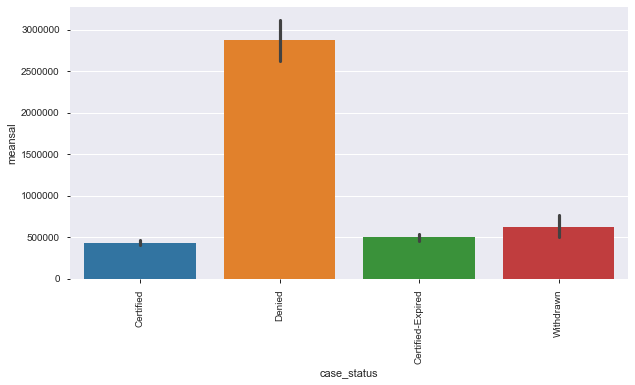

In [166]:
plt.figure(figsize=(10,5))
sns.barplot(d.case_status,d.meansal)
plt.xticks(rotation=90)
plt.show()

### Applicants with very high salary in their own country were denied the most for visa

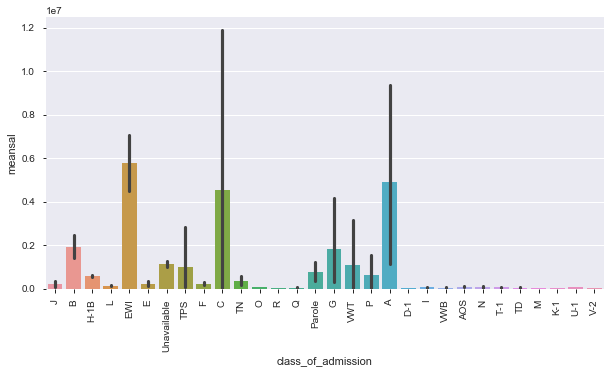

In [167]:
plt.figure(figsize=(10,5))
sns.barplot(d.class_of_admission,d.meansal)
plt.xticks(rotation=90)
plt.show()

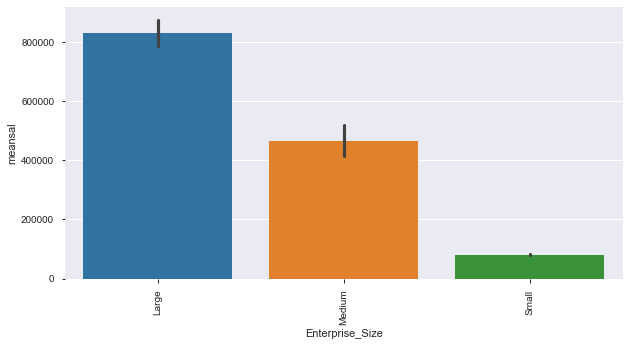

In [168]:
plt.figure(figsize=(10,5))
sns.barplot(d.Enterprise_Size,d.meansal)
plt.xticks(rotation=90)
plt.show()

### It has no effect on salary

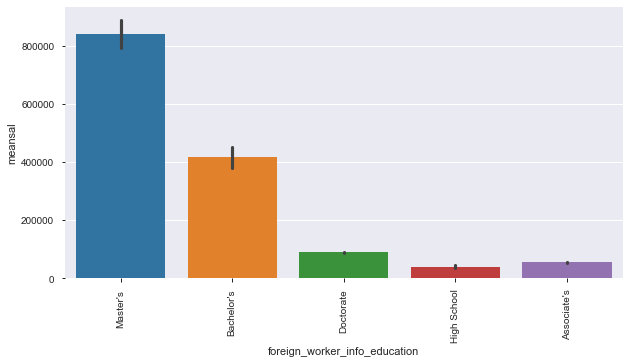

In [169]:
plt.figure(figsize=(10,5))
sns.barplot(d.foreign_worker_info_education,d.meansal)
plt.xticks(rotation=90)
plt.show()

In [170]:
pd.crosstab(d.case_status,d.source_name)

source_name,CBA,DBA,Employer Conducted,OES,Other,SCA
case_status,,,,,,
Certified,1472,0,117,163531,12866,14
Certified-Expired,1285,0,94,133152,10327,8
Denied,629,24,296,22846,1229,45
Withdrawn,198,0,26,16403,1057,8


In [171]:
d.head()

,agent_state,application_type,case_status,class_of_admission,country_of_citizenship,employer_yr_estab,employer_city,employer_name,employer_state,foreign_worker_info_education,...,job_work_state,pv_unit_of_pay_9089,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent
0,West,PERM,Certified,J,ARMENIA,New,NEW YORK,NETSOFT USA INC.,Northeast,Master's,...,Northeast,Year,Level II,OES,IT,2007,2012,75629.000,Large,ASIA
1,West,PERM,Denied,B,POLAND,New,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,Northeast,Master's,...,Northeast,Year,Level I,OES,Other Economic Sector,2007,2011,37024.000,Large,EUROPE
2,West,PERM,Certified,H-1B,INDIA,New,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",South,Master's,...,South,Year,Level I,OES,Aerospace,2007,2011,47923.000,Large,ASIA
3,West,PERM,Certified,B,SOUTH KOREA,New,FLUSHING,EBENEZER MISSION CHURCH,Northeast,Master's,...,Northeast,Year,Level II,OES,Other Economic Sector,2007,2011,10975.485,Large,ASIA
4,West,PERM,Certified,L,CANADA,New,ALBANY,ALBANY INTERNATIONAL CORP.,Northeast,Master's,...,Northeast,Year,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Large,North America


In [172]:
pd.crosstab(d.case_status,d.class_of_admission)

class_of_admission,A,AOS,B,C,D-1,E,EWI,F,G,H-1B,...,R,T-1,TD,TN,TPS,U-1,Unavailable,V-2,VWB,VWT
case_status,,,,,,,,,,,,,,,,,,,,,
Certified,66,2,1529,17,1,2688,507,7780,84,137853,...,56,1,9,2193,93,0,12786,1,5,18
Certified-Expired,52,1,1076,10,2,1928,547,5440,65,115167,...,38,2,2,1681,55,2,8057,0,3,15
Denied,31,0,1144,17,3,665,807,1551,23,14664,...,13,1,1,192,30,0,4879,1,2,24
Withdrawn,6,0,198,3,0,370,76,1019,11,12603,...,12,0,3,195,9,0,2204,0,0,1


In [173]:
pd.crosstab(d.case_status,d.employer_yr_estab)

employer_yr_estab,Ancient,New,Old
case_status,,,
Certified,63096,79330,35574
Certified-Expired,49105,65877,29884
Denied,8549,13758,2762
Withdrawn,7044,8227,2421


In [174]:
pd.crosstab(d.case_status,d.employer_city)

employer_city,", NEW YORK",", New York",200 WEST STREET,37-18 QUEENS BLVD,39TH FLOOR,ABBEVILLE,ABBOTSFORD,ABBOTT PARK,ABERDEEN,ABILENE,...,winter garden,winter springs,wixom,woodbridge,woodland hills,woodstock,wynnewood,yardley,yorktown heights,Ã€VENTURA
case_status,,,,,,,,,,,,,,,,,,,,,
Certified,0,0,0,1,1,0,126,76,8,6,...,1,1,2,2,1,1,1,0,0,1
Certified-Expired,1,1,0,0,0,1,62,55,11,2,...,0,0,0,0,0,0,0,1,1,0
Denied,0,0,0,0,0,0,47,18,3,3,...,0,0,1,0,0,1,0,0,0,0
Withdrawn,0,0,1,0,0,0,78,13,2,0,...,0,0,1,0,0,0,0,0,0,0


In [175]:
d.drop('employer_city',axis=1,inplace=True)    # 8.3k unique vales

In [176]:
pd.crosstab(d.case_status,d.foreign_worker_info_education)

foreign_worker_info_education,Associate's,Bachelor's,Doctorate,High School,Master's
case_status,,,,,
Certified,1140,70244,5960,2024,98632
Certified-Expired,667,53069,5440,1002,84688
Denied,411,10811,345,885,12617
Withdrawn,111,8691,482,233,8175


In [177]:
pd.crosstab(d.case_status,d.employer_state)

employer_state,Island,Midwest,Northeast,South,West
case_status,,,,,
Certified,300,25579,43313,48697,60111
Certified-Expired,185,19959,35655,39108,49959
Denied,149,3312,5956,8920,6732
Withdrawn,29,2677,4102,5273,5611


In [178]:
pd.crosstab(d.case_status,d.job_experience)

job_experience,N,Y
case_status,,
Certified,51677,126323
Certified-Expired,38716,106150
Denied,9034,16035
Withdrawn,9092,8600


In [179]:
pd.crosstab(d.case_status,d.job_training)

job_training,N,Y
case_status,,
Certified,176196,1804
Certified-Expired,143140,1726
Denied,24461,608
Withdrawn,17508,184


In [180]:
pd.crosstab(d.case_status,d.job_work_state)

job_work_state,Island,Midwest,Northeast,Other,South,West
case_status,,,,,,
Certified,313,25047,41959,828,51066,58787
Certified-Expired,206,19820,34831,720,40847,48442
Denied,151,3269,6142,204,8329,6974
Withdrawn,29,2549,4147,85,5391,5491


In [181]:
pd.crosstab(d.case_status,d.sector)

sector,Advanced Mfg,Aerospace,Agribusiness,Automotive,Biotechnology,Construction,Educational Services,Energy,Finance,Geospatial,Health Care,Homeland Security,Hospitality,IT,Other Economic Sector,Retail,Transportation
case_status,,,,,,,,,,,,,,,,,
Certified,22865,1945,317,459,215,476,4031,536,6393,72,3281,28,637,39871,15534,2254,429
Certified-Expired,11100,5670,225,474,209,475,11837,441,10170,57,8906,36,555,50529,10505,5697,368
Denied,1477,337,242,151,12,364,1404,44,890,8,794,14,575,9907,2726,481,96
Withdrawn,2056,380,155,79,20,94,988,65,995,4,669,4,159,4927,2831,384,56


In [182]:
pd.crosstab(d.case_status,d.source_name)

source_name,CBA,DBA,Employer Conducted,OES,Other,SCA
case_status,,,,,,
Certified,1472,0,117,163531,12866,14
Certified-Expired,1285,0,94,133152,10327,8
Denied,629,24,296,22846,1229,45
Withdrawn,198,0,26,16403,1057,8


In [183]:
d.drop('employer_name',axis=1,inplace=True)
d.drop('employer_city',axis=1,inplace=True)

KeyError: "['employer_city'] not found in axis"

In [184]:
d.drop('country_of_citizenship',inplace=True,axis=1)

In [185]:
d.isnull().sum()

agent_state                           0
application_type                  95089
case_status                           0
class_of_admission                    0
employer_yr_estab                     0
employer_state                        0
foreign_worker_info_education         0
foreign_worker_info_major             0
job_experience                        0
job_training                          0
job_work_state                        0
pv_unit_of_pay_9089                   0
level                                 0
source_name                           0
sector                           115642
case_received_date_year               0
decision_date_year                    0
meansal                               0
Enterprise_Size                       0
continent                             0
dtype: int64

In [186]:
d.shape

(365627, 20)

In [187]:
d.head()

,agent_state,application_type,case_status,class_of_admission,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_training,job_work_state,pv_unit_of_pay_9089,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent
0,West,PERM,Certified,J,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level II,OES,IT,2007,2012,75629.000,Large,ASIA
1,West,PERM,Denied,B,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level I,OES,Other Economic Sector,2007,2011,37024.000,Large,EUROPE
2,West,PERM,Certified,H-1B,New,South,Master's,Engineer,Y,N,South,Year,Level I,OES,Aerospace,2007,2011,47923.000,Large,ASIA
3,West,PERM,Certified,B,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level II,OES,Other Economic Sector,2007,2011,10975.485,Large,ASIA
4,West,PERM,Certified,L,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Large,North America


In [188]:
d.columns

Index(['agent_state', 'application_type', 'case_status', 'class_of_admission',
       'employer_yr_estab', 'employer_state', 'foreign_worker_info_education',
       'foreign_worker_info_major', 'job_experience', 'job_training',
       'job_work_state', 'pv_unit_of_pay_9089', 'level', 'source_name',
       'sector', 'case_received_date_year', 'decision_date_year', 'meansal',
       'Enterprise_Size', 'continent'],
      dtype='object')

In [189]:
d.shape

(365627, 20)

### Exporting Clean Data

In [191]:
d.head()



,agent_state,application_type,case_status,class_of_admission,employer_yr_estab,employer_state,foreign_worker_info_education,foreign_worker_info_major,job_experience,job_training,job_work_state,pv_unit_of_pay_9089,level,source_name,sector,case_received_date_year,decision_date_year,meansal,Enterprise_Size,continent
0,West,PERM,Certified,J,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level II,OES,IT,2007,2012,75629.000,Large,ASIA
1,West,PERM,Denied,B,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level I,OES,Other Economic Sector,2007,2011,37024.000,Large,EUROPE
2,West,PERM,Certified,H-1B,New,South,Master's,Engineer,Y,N,South,Year,Level I,OES,Aerospace,2007,2011,47923.000,Large,ASIA
3,West,PERM,Certified,B,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level II,OES,Other Economic Sector,2007,2011,10975.485,Large,ASIA
4,West,PERM,Certified,L,New,Northeast,Master's,Engineer,Y,N,Northeast,Year,Level IV,OES,Advanced Mfg,2007,2012,97445.000,Large,North America


In [192]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365627 entries, 0 to 374361
Data columns (total 20 columns):
agent_state                      365627 non-null object
application_type                 270538 non-null object
case_status                      365627 non-null object
class_of_admission               365627 non-null object
employer_yr_estab                365627 non-null object
employer_state                   365627 non-null object
foreign_worker_info_education    365627 non-null object
foreign_worker_info_major        365627 non-null object
job_experience                   365627 non-null object
job_training                     365627 non-null object
job_work_state                   365627 non-null object
pv_unit_of_pay_9089              365627 non-null object
level                            365627 non-null object
source_name                      365627 non-null object
sector                           249985 non-null object
case_received_date_year          365627 non-null 

### Base Model

In [193]:
#d.drop('country_of_citizenship',axis=1,inplace=True)
d.shape

(365627, 20)

In [194]:
def target(x):
    if x=="Certified":
        return 0
    elif x=="Certified-Expired":
        return 1
    elif x=='Denied':
        return 2
    else:
        return 3
d.case_status=d.case_status.apply(target)

In [195]:
dummy=pd.get_dummies(d)

In [196]:
dummy.head()

,case_status,case_received_date_year,decision_date_year,meansal,agent_state_Island,agent_state_Midwest,agent_state_Northeast,agent_state_South,agent_state_West,application_type_MAILEDIN,...,sector_Transportation,Enterprise_Size_Large,Enterprise_Size_Medium,Enterprise_Size_Small,continent_AFRICA,continent_ASIA,continent_EUROPE,continent_North America,continent_Oceania,continent_South America
0,0,2007,2012,75629.000,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,2,2007,2011,37024.000,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0,2007,2011,47923.000,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0,2007,2011,10975.485,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,2007,2012,97445.000,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [197]:
dummy.columns

Index(['case_status', 'case_received_date_year', 'decision_date_year',
       'meansal', 'agent_state_Island', 'agent_state_Midwest',
       'agent_state_Northeast', 'agent_state_South', 'agent_state_West',
       'application_type_MAILEDIN',
       ...
       'sector_Transportation', 'Enterprise_Size_Large',
       'Enterprise_Size_Medium', 'Enterprise_Size_Small', 'continent_AFRICA',
       'continent_ASIA', 'continent_EUROPE', 'continent_North America',
       'continent_Oceania', 'continent_South America'],
      dtype='object', length=113)

In [198]:
x=dummy.drop('case_status',axis=1)
y=dummy['case_status']

In [201]:
x.head()

,case_received_date_year,decision_date_year,meansal,agent_state_Island,agent_state_Midwest,agent_state_Northeast,agent_state_South,agent_state_West,application_type_MAILEDIN,application_type_ONLINE,...,sector_Transportation,Enterprise_Size_Large,Enterprise_Size_Medium,Enterprise_Size_Small,continent_AFRICA,continent_ASIA,continent_EUROPE,continent_North America,continent_Oceania,continent_South America
0,2007,2012,75629.000,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2007,2011,37024.000,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2007,2011,47923.000,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2007,2011,10975.485,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2007,2012,97445.000,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [204]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)

In [205]:
#scaled_train=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
#scaled_test=pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [207]:
model=rf.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [208]:
from sklearn.metrics import classification_report,f1_score,confusion_matrix,cohen_kappa_score,matthews_corrcoef,accuracy_score

In [209]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     35675
           1       0.77      0.80      0.78     28710
           2       0.65      0.45      0.53      5128
           3       0.59      0.37      0.46      3613

    accuracy                           0.77     73126
   macro avg       0.70      0.61      0.64     73126
weighted avg       0.76      0.77      0.76     73126



In [210]:
accuracy_score(ytest,ypred)    # previous value = 67%

0.7677433470995269

In [211]:
cohen_kappa_score(ytest,ypred)   # previous value = 0.44

0.6028538301247282

In [212]:
matthews_corrcoef(ytest,ypred)

0.60395388955402

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
 #grid search for decision trees
dtree =DecisionTreeClassifier(random_state = 0)
base_results_dtree = cross_validate(dtree, x, y, cv  = cv_split, return_train_score=True)
dtree.fit(x, y)

epoch=0
for train_score,test_score in zip(base_results_dtree['train_score'], base_results_dtree['test_score']):
        epoch +=1       
        print("epoch:",epoch,"train_score:",train_score, "test_score:",test_score)
print('-'*10)

print('BEFORE Tuning Parameters: ', dtree.get_params())
print("BEFORE Tuning Training w/bin score mean: {:.2f}". format(base_results_dtree['train_score'].mean()*100)) 
print("BEFORE Tuning Test w/bin score mean: {:.2f}". format(base_results_dtree['test_score'].mean()*100))
print('-'*10)

param_grid = {'criterion': ['gini','entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              #'min_samples_split': [2,5,7,10,12], 
              #'min_samples_leaf': [1,3,5,7, 10], 
              'random_state': [0] 
             }


tune_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model.fit(x, y)

for i in range(10):
    print("epoch:",i,"train_score:",tune_model.cv_results_['split'+str(i)+'_train_score'][tune_model.best_index_],
    "test_score:",tune_model.cv_results_['split'+str(i)+'_test_score'][tune_model.best_index_])

print('-'*10)    

print('AFTER Tuning Parameters: ', tune_model.best_params_)
print("AFTER Tuning Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
print("AFTER Tuning Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print('-'*10)

####  Other models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
dtmodel=dt.fit(xtrain,ytrain)
dtpred=dtmodel.predict(xtest)

In [ ]:
print(accuracy_score(ytest,dtpred))

In [ ]:
cohen_kappa_score(ytest,dtpred)

In [ ]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy',random_state=0,)
DT_boost=AdaBoostClassifier(n_estimators=100,random_state=0)
LR_boost=AdaBoostClassifier(n_estimators=100,base_estimator=LR,random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=rf,n_estimators=100,random_state=0)
GBoost=GradientBoostingClassifier(n_estimators=100,random_state=0)

In [ ]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
mod=DT_boost.fit(xtrain,ytrain)
pr=mod.predict(xtest)

In [ ]:
print(accuracy_score(ytest,dtpred))
print(cohen_kappa_score(ytest,dtpred))

In [ ]:
mod1=GBoost.fit(xtrain,ytrain)
pr1=mod1.predict(xtest)
print(accuracy_score(ytest,pr1))
print(cohen_kappa_score(ytest,pr1))